In [1]:
import pandas as pd
import numpy as np

# Load the original CSV file
file_path = 'Employee_testdata_with_performance.csv'
df = pd.read_csv(file_path)

# Define the number of samples to generate
num_samples = df.shape[0]

# Generate synthetic data using bootstrapping
team_engagement = np.random.choice(df['Performance'], size=num_samples, replace=True)
collaboration = np.random.choice(df['Performance'], size=num_samples, replace=True)
flexibility = np.random.choice(df['Performance'], size=num_samples, replace=True)

# Add some noise to make the synthetic data more realistic
team_engagement += np.random.normal(0, 5, num_samples)
collaboration += np.random.normal(0, 5, num_samples)
flexibility += np.random.normal(0, 5, num_samples)

# Create a DataFrame for the synthetic data
synthetic_df = pd.DataFrame({
    'TeamEngagement': team_engagement,
    'Collaboration': collaboration,
    'Flexibility': flexibility
})

# Merge the synthetic data with the original data
df_updated = pd.concat([df, synthetic_df], axis=1)

# Save the updated DataFrame to a new CSV file
updated_file_path = 'Employee_testdata_with_synthetic_behavior_bootstrapping_1.csv'
df_updated.to_csv(updated_file_path, index=False)

# Display the first few rows of the updated dataframe
df_updated.head()

,EmployeeID,Education,JoiningYear,City,Country,Region,PaymentTier,Age,Gender,ExperienceInCurrentDomain,Performance,TeamEngagement,Collaboration,Flexibility
0,1,Bachelors,2017,Toronto,Canada,North America,3,34,Male,0,74.967142,66.768654,85.890931,73.113457
1,2,Bachelors,2013,Pune,India,Asia,1,28,Female,3,68.617357,71.945510,59.299277,64.755941
2,3,Bachelors,2014,New Delhi,India,Asia,3,38,Female,2,76.476885,81.767908,72.346086,67.936244
3,4,Masters,2016,Vancouver,Canada,North America,3,27,Male,5,85.230299,52.951768,74.476526,78.779519
4,5,Masters,2017,Berlin,Germany,Europe,3,24,Male,2,67.658466,66.920410,72.410463,87.990057


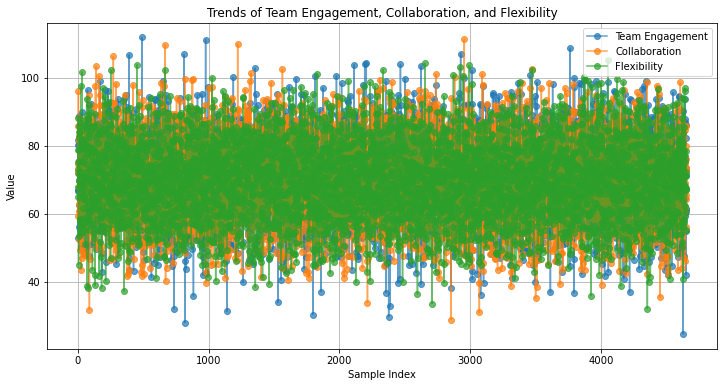

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot lines for each variable
plt.plot(synthetic_df.index, synthetic_df['TeamEngagement'], label='Team Engagement', marker='o', alpha=0.7)
plt.plot(synthetic_df.index, synthetic_df['Collaboration'], label='Collaboration', marker='o', alpha=0.7)
plt.plot(synthetic_df.index, synthetic_df['Flexibility'], label='Flexibility', marker='o', alpha=0.7)

# Adding titles and labels
plt.title('Trends of Team Engagement, Collaboration, and Flexibility')
plt.xlabel('Sample Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.show()


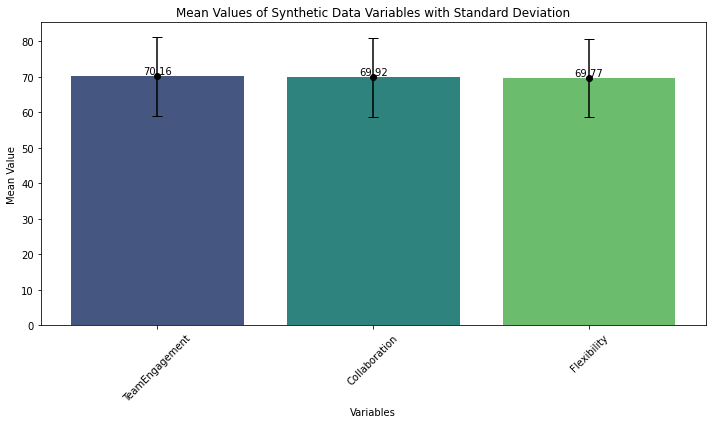

In [3]:
# Calculate mean values and standard deviations for each variable
mean_values = synthetic_df.mean()
std_values = synthetic_df.std()

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Variable': mean_values.index,
    'Mean': mean_values.values,
    'Standard Deviation': std_values.values
})

plt.figure(figsize=(10, 6))

# Create a bar plot with error bars
bar_plot = sns.barplot(x='Variable', y='Mean', data=plot_df, palette='viridis', ci=None)

# Add error bars
for index, value in enumerate(plot_df['Mean']):
    plt.errorbar(index, value, yerr=plot_df['Standard Deviation'][index], fmt='o', color='black', capsize=5)

# Add annotations for mean values
for index, value in enumerate(plot_df['Mean']):
    plt.text(index, value + 0.02, f'{value:.2f}', ha='center', va='bottom')

# Set titles and labels
plt.title('Mean Values of Synthetic Data Variables with Standard Deviation')
plt.xlabel('Variables')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()

plt.show()


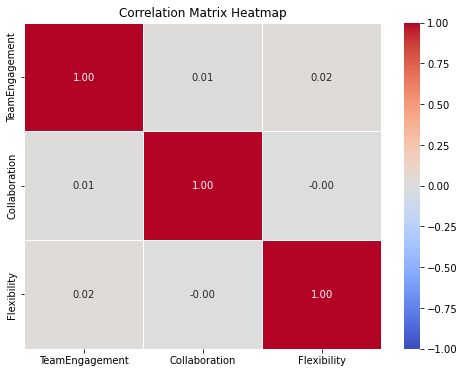

In [4]:
# Calculate the correlation matrix for the synthetic data
corr_matrix = synthetic_df.corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()
